# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
#Import data set and separate columns at ;
train = pd.read_csv("train.csv", delimiter = ';')
test = pd.read_csv("test.csv", delimiter = ';')

In [3]:
# Concatenate the two dataframes vertically (along rows)
Banking_data = pd.concat([train, test], ignore_index=True)

In [4]:
#Get cloumns names
Banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#check for null values
Banking_data.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [6]:
# Save the merged dataframe to a new CSV file
Banking_data.to_csv("Banking_data.csv", index=False)

In [7]:
df = pd.read_csv("Banking_data.csv")

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [9]:
#Get the shape of the DataFrame
df.shape

(49732, 17)

In [10]:
#Get uniques values
job = df.job.unique()
month = df.month.unique()
marital = df.marital.unique()
education = df.education.unique()
contact = df.contact.unique()
poutcome = df.poutcome.unique()

print(job)
print()
print(month)
print()
print(marital)
print()
print(education)
print()
print(contact)
print()
print(poutcome)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

['married' 'single' 'divorced']

['tertiary' 'secondary' 'unknown' 'primary']

['unknown' 'cellular' 'telephone']

['unknown' 'failure' 'other' 'success']


In [11]:
#Change prediction column name
df.rename(columns = {'y':'FDcreated'}, inplace=True)

Encoding

In [12]:
#change yes = 1 no = 0
df['default'] = df['default'].map({'yes': 1, 'no':0})
df['housing'] = df['housing'].map({'yes': 1, 'no':0})
df['loan'] = df['loan'].map({'yes': 1, 'no':0})
df['default'] = df['default'].map({'yes': 1, 'no':0})
df['FDcreated'] = df['FDcreated'].map({'yes': 1, 'no':0})

#Give values for each attribute
df['marital'] = df['marital'].map({'married': 1, 'single':2, 'divorced':3})
df['education'] = df['education'].map({'unknown':np.nan, 'tertiary': 1, 'secondary':2,'primary':3})
df['job'] = df['job'].map({'unknown':np.nan ,'admin': 1,'unemployed':2, 'management':3, 'housemaid':4, 'entrepreneur':5, 'student':6, 'blue-collar':7, 'self-employed':8, 'retired':9, 'technician':10, 'services':11})
df['contact'] = df['contact'].map({'unknown': np.nan, 'cellular':1, 'telephone':2})
df['month'] = df['month'].map({'jan': 1, 'feb':2 ,'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
df['poutcome'] = df['poutcome'].map({'unknown': np.nan, 'failure':1, 'other':2, 'success':3})


df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,58,3.0,1,1.0,NaN,2143,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,10.0,2,2.0,NaN,29,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,5.0,1,2.0,NaN,2,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,7.0,1,NaN,NaN,1506,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,2,NaN,NaN,1,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,11.0,1,2.0,NaN,-333,1,0,1.0,30,7,329,5,-1,0,NaN,0
49728,57,8.0,1,1.0,NaN,-3313,1,1,NaN,9,5,153,1,-1,0,NaN,0
49729,57,10.0,1,2.0,NaN,295,0,0,1.0,19,8,151,11,-1,0,NaN,0
49730,28,7.0,1,2.0,NaN,1137,0,0,1.0,6,2,129,4,211,3,2.0,0


Normalization

In [13]:
#Balance
minB = df['balance'].min()
maxB = df['balance'].max()

print("Minimum balance: ", minB)
print("Maximum balance: ", maxB)

Minimum balance:  -8019
Maximum balance:  102127


In [14]:
df['balance'] = df['balance'].apply(lambda v: (v - df['balance'].min())/ (df['balance'].max() - df['balance'].min()))

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,58,3.0,1,1.0,NaN,0.092259,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,10.0,2,2.0,NaN,0.073067,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,5.0,1,2.0,NaN,0.072822,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,7.0,1,NaN,NaN,0.086476,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,2,NaN,NaN,0.072812,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,11.0,1,2.0,NaN,0.069780,1,0,1.0,30,7,329,5,-1,0,NaN,0
49728,57,8.0,1,1.0,NaN,0.042725,1,1,NaN,9,5,153,1,-1,0,NaN,0
49729,57,10.0,1,2.0,NaN,0.075482,0,0,1.0,19,8,151,11,-1,0,NaN,0
49730,28,7.0,1,2.0,NaN,0.083126,0,0,1.0,6,2,129,4,211,3,2.0,0


In [15]:
#pdays
minD = df['pdays'].min()
maxD = df['pdays'].max()

print("Minimum pdays: ", minD)
print("Maximum pdays: ", maxD)

Minimum pdays:  -1
Maximum pdays:  871


In [16]:
df['pdays'] = df['pdays'].apply(lambda v: (v - df['pdays'].min())/ (df['pdays'].max() - df['pdays'].min()))

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,58,3.0,1,1.0,NaN,0.092259,1,0,NaN,5,5,261,1,0.000000,0,NaN,0
1,44,10.0,2,2.0,NaN,0.073067,1,0,NaN,5,5,151,1,0.000000,0,NaN,0
2,33,5.0,1,2.0,NaN,0.072822,1,1,NaN,5,5,76,1,0.000000,0,NaN,0
3,47,7.0,1,NaN,NaN,0.086476,1,0,NaN,5,5,92,1,0.000000,0,NaN,0
4,33,NaN,2,NaN,NaN,0.072812,0,0,NaN,5,5,198,1,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,11.0,1,2.0,NaN,0.069780,1,0,1.0,30,7,329,5,0.000000,0,NaN,0
49728,57,8.0,1,1.0,NaN,0.042725,1,1,NaN,9,5,153,1,0.000000,0,NaN,0
49729,57,10.0,1,2.0,NaN,0.075482,0,0,1.0,19,8,151,11,0.000000,0,NaN,0
49730,28,7.0,1,2.0,NaN,0.083126,0,0,1.0,6,2,129,4,0.243119,3,2.0,0


In [17]:
#get the counts without NaN values
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
count,49732.000000,43757.000000,49732.000000,47688.000000,0.0,49732.000000,49732.000000,49732.000000,35388.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,9068.000000,49732.000000
mean,40.957472,6.837237,1.511864,1.850654,NaN,0.085221,0.556764,0.159555,1.090624,15.816315,6.146666,258.690179,2.766549,0.047200,0.576892,1.586348,0.116826
std,10.615008,2.952440,0.693185,0.665441,NaN,0.027614,0.496772,0.366197,0.287078,8.315680,2.405338,257.743149,3.099075,0.114825,2.254838,0.777382,0.321216
min,18.000000,2.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,3.000000,1.000000,1.000000,NaN,0.073457,0.000000,0.000000,1.000000,8.000000,5.000000,103.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,7.000000,1.000000,2.000000,NaN,0.076871,1.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,10.000000,2.000000,2.000000,NaN,0.085795,1.000000,0.000000,1.000000,21.000000,8.000000,320.000000,3.000000,0.000000,0.000000,2.000000,0.000000
max,95.000000,11.000000,3.000000,3.000000,NaN,1.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,1.000000,275.000000,3.000000,1.000000


In [18]:
#find the correlation between attributes and target varibel(FDCreated)
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
age,1.000000,0.022420,-0.126154,0.169024,NaN,0.096564,-0.186225,-0.015299,0.193826,-0.009880,0.091204,-0.004399,0.003877,-0.022419,0.000928,0.052004,0.026939
job,0.022420,1.000000,0.006253,0.308947,NaN,-0.059361,0.069373,0.054872,0.015309,-0.000567,-0.041774,0.001086,-0.002986,0.007885,-0.010544,-0.026480,-0.028155
marital,-0.126154,0.006253,1.000000,-0.102812,NaN,-0.028258,-0.013138,-0.018112,-0.051503,-0.004975,-0.042940,0.020308,-0.028973,0.019849,0.006556,0.022325,0.045431
education,0.169024,0.308947,-0.102812,1.000000,NaN,-0.068171,0.078523,0.027624,0.112556,-0.025722,-0.073731,-0.001404,-0.004625,-0.004705,-0.025336,-0.075249,-0.069513
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.096564,-0.059361,-0.028258,-0.068171,NaN,1.000000,-0.067068,-0.083231,0.036429,0.003348,0.095087,0.018195,-0.014147,0.003968,0.017243,0.049263,0.049705
housing,-0.186225,0.069373,-0.013138,0.078523,NaN,-0.067068,1.000000,0.039248,-0.054248,-0.028256,-0.173601,0.006088,-0.021760,0.123508,0.037042,-0.281824,-0.136070
loan,-0.015299,0.054872,-0.018112,0.027624,NaN,-0.083231,0.039248,1.000000,-0.016331,0.009908,0.023176,-0.011781,0.010603,-0.023490,-0.011729,-0.104080,-0.068381
contact,0.193826,0.015309,-0.051503,0.112556,NaN,0.036429,-0.054248,-0.016331,1.000000,0.024829,0.005578,-0.030472,0.065156,-0.026655,0.002168,0.020872,-0.010817
day,-0.009880,-0.000567,-0.004975,-0.025722,NaN,0.003348,-0.028256,0.009908,0.024829,1.000000,0.100077,-0.029674,0.162336,-0.093166,-0.052083,0.016573,-0.026821


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

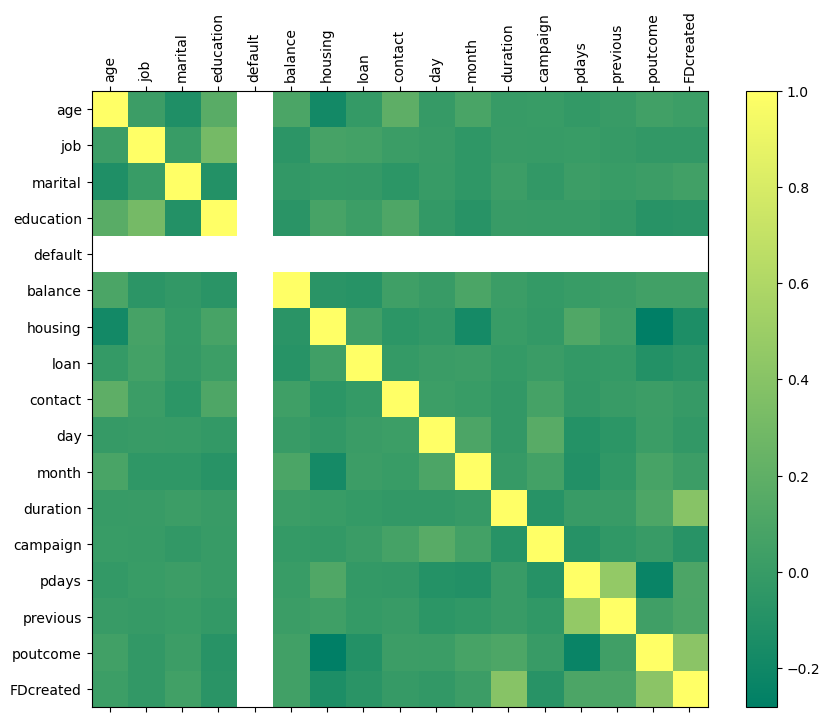

In [20]:
# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap using the specified colormap
cax = ax.matshow(df.corr(), cmap="summer")

# Add a colorbar for reference
plt.colorbar(cax)

# Set axis labels and ticks
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')
plt.yticks(range(len(df.columns)), df.columns, rotation='horizontal')

# Show the plot
plt.show()

In [21]:
df.corr()["FDcreated"].sort_values(ascending=False)

FDcreated    1.000000
poutcome     0.419028
duration     0.395099
pdays        0.103665
previous     0.094567
balance      0.049705
marital      0.045431
age          0.026939
month        0.019125
contact     -0.010817
day         -0.026821
job         -0.028155
loan        -0.068381
education   -0.069513
campaign    -0.072085
housing     -0.136070
default           NaN
Name: FDcreated, dtype: float64

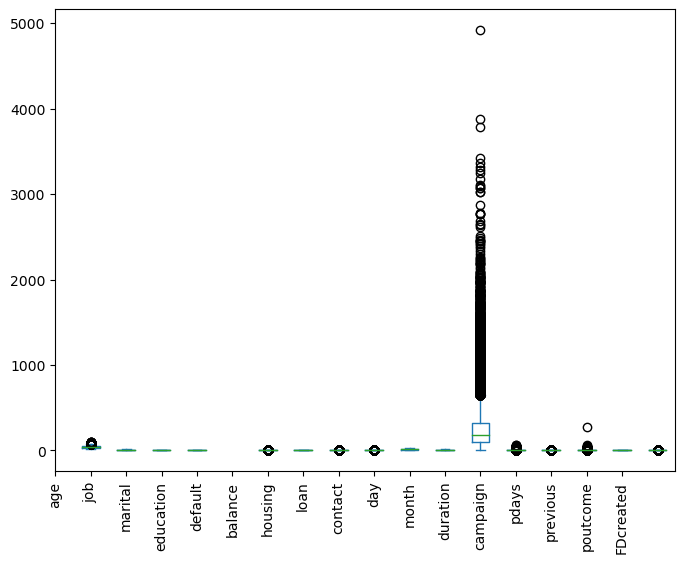

In [22]:
#Find outliers

fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot
df.plot.box(ax=ax)

# Set axis labels and ticks
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')

# Show the plot
plt.show()

In [23]:
#Drop unwanted columns
df.drop(columns = ['contact','day', 'job','loan', 'education', 'campaign', 'housing', 'default'], axis = 'columns', inplace=True)

In [24]:
df

,age,marital,balance,month,duration,pdays,previous,poutcome,FDcreated
0,58,1,0.092259,5,261,0.000000,0,NaN,0
1,44,2,0.073067,5,151,0.000000,0,NaN,0
2,33,1,0.072822,5,76,0.000000,0,NaN,0
3,47,1,0.086476,5,92,0.000000,0,NaN,0
4,33,2,0.072812,5,198,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...
49727,33,1,0.069780,7,329,0.000000,0,NaN,0
49728,57,1,0.042725,5,153,0.000000,0,NaN,0
49729,57,1,0.075482,8,151,0.000000,0,NaN,0
49730,28,1,0.083126,2,129,0.243119,3,2.0,0


In [25]:
#drop NaN values
df = df.dropna()

In [26]:
df

,age,marital,balance,month,duration,pdays,previous,poutcome,FDcreated
24060,33,1,0.080811,10,39,0.174312,3,1.0,0
24062,42,2,0.070561,10,519,0.191514,1,2.0,1
24064,33,1,0.104071,10,144,0.105505,4,1.0,1
24072,36,1,0.094729,10,73,0.099771,4,2.0,0
24077,36,1,0.072803,10,140,0.165138,3,1.0,1
...,...,...,...,...,...,...,...,...,...
49703,32,2,0.075609,4,346,0.269495,3,1.0,0
49715,42,2,0.082609,5,951,0.425459,4,1.0,1
49725,38,1,0.083743,4,45,0.176606,1,1.0,0
49730,28,1,0.083126,2,129,0.243119,3,2.0,0


# Data Visualizing

(1) Plot of the Created FD Account or not - Count

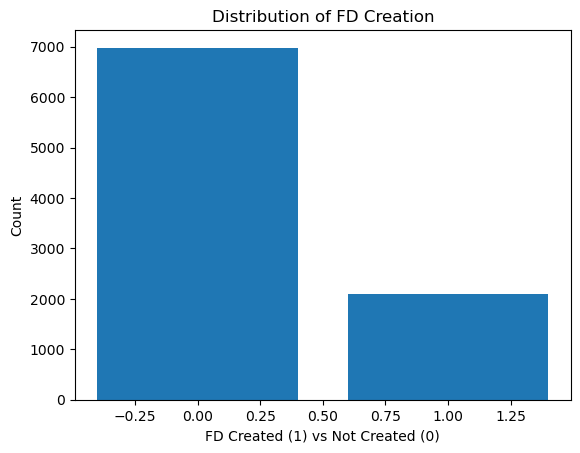

In [27]:
import matplotlib.pyplot as plt

# Count the occurrences of 1s and 0s in the 'FDcreated' column
fd_counts = df['FDcreated'].value_counts()

# Create a bar plot
plt.bar(fd_counts.index, fd_counts.values)

# Add labels and title
plt.xlabel('FD Created (1) vs Not Created (0)')
plt.ylabel('Count')
plt.title('Distribution of FD Creation')

# Show the plot
plt.show()

(2) Compare the ages of customers who took fixed deposit and who didn’t

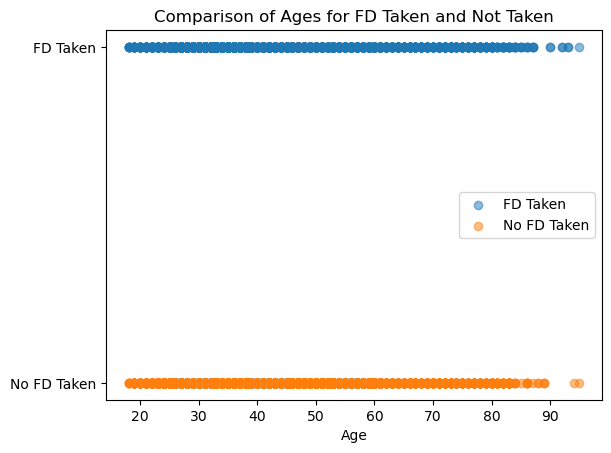

In [28]:
import matplotlib.pyplot as plt

# Create a DataFrame for easier manipulation
df = pd.read_csv('df.csv')

# Split the data into two groups: customers who took FD and those who didn't
fd_yes = df[df['FDcreated'] == 1]
fd_no = df[df['FDcreated'] == 0]

# Plot the ages
plt.scatter(fd_yes['age'], [1]*len(fd_yes), label='FD Taken', alpha=0.5)
plt.scatter(fd_no['age'], [0]*len(fd_no), label='No FD Taken', alpha=0.5)

# Set labels and title
plt.xlabel('Age')
plt.yticks([0, 1], ['No FD Taken', 'FD Taken'])
plt.title('Comparison of Ages for FD Taken and Not Taken')

# Add legend
plt.legend()

# Show the plot
plt.show()


(3) Compare the duration of customers who took fixed deposit and who didn’t

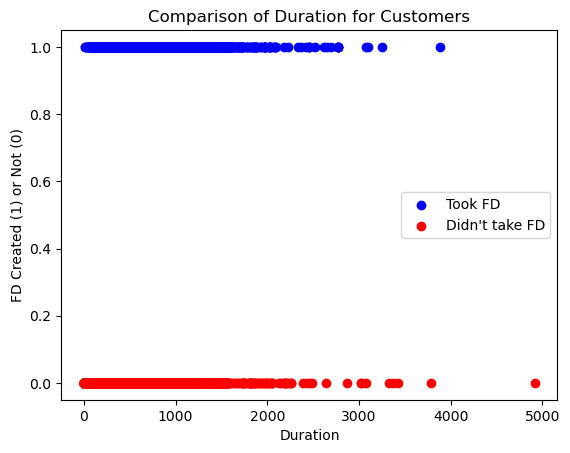

In [29]:
import matplotlib.pyplot as plt

# Assuming "df" is your DataFrame
df_yes_fd = df[df['FDcreated'] == 1]  # Selecting rows where FD was created
df_no_fd = df[df['FDcreated'] == 0]   # Selecting rows where FD was not created

# Scatter plot for customers who took fixed deposit
plt.scatter(df_yes_fd['duration'], df_yes_fd['FDcreated'], color='blue', label='Took FD')

# Scatter plot for customers who didn't take fixed deposit
plt.scatter(df_no_fd['duration'], df_no_fd['FDcreated'], color='red', label="Didn't take FD")

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('FD Created (1) or Not (0)')
plt.title('Comparison of Duration for Customers')

# Add a legend
plt.legend()

# Show the plot
plt.show()


(4) Plot a pie chart to show the fractions of customers who subscribed fixed deposits with different ages

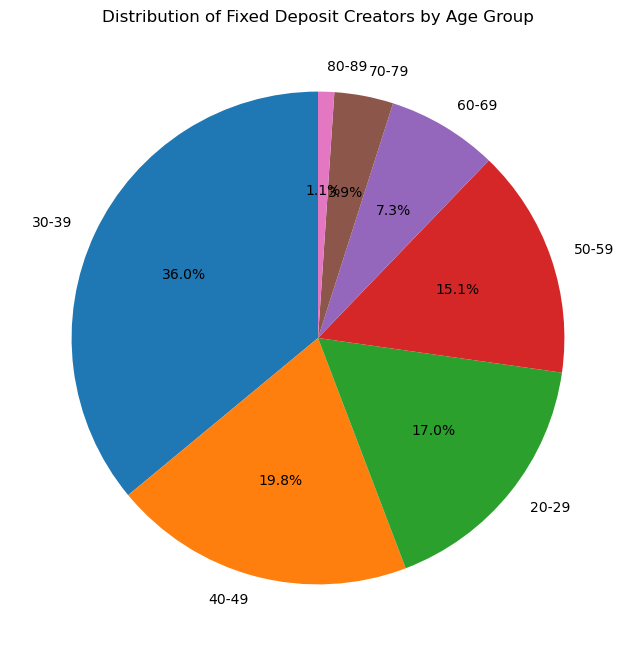

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to consider only those who created fixed deposits (fixed_deposits_created == 1)
created_deposits = df[df['FDcreated'] == 1]

# Define age groups (you can customize these as needed)
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Group the data by age groups and count the occurrences
age_groups = pd.cut(created_deposits['age'], bins=bins, labels=labels, right=False)
age_group_counts = age_groups.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fixed Deposit Creators by Age Group')

# Show the plot
plt.show()

(5) Compare housingLoan column with FDcreated column

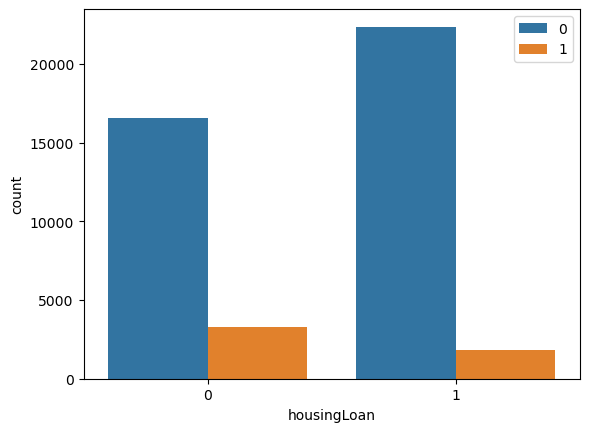

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

graphs = ['housingLoan']

# Count the occurrences of 1s and 0s in the 'FDcreated' column
y1 = df['FDcreated']
y1 = y1.values

for i in graphs:
    sns.countplot(x=i, hue=y1, data=df)
    plt.show()

# Model Training

In [32]:
#divide dataset into independent and dependent variables
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [33]:
#save dataset in new csv file
df.to_csv('df.csv', index=False)

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Decision Tree classifier

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Create the Decision Tree Classifier model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt.predict(X_test)

# Calculate the error
error = 1 - accuracy_score(y_test, dt_pred)

# Print the error
print('Error of Decision Tree Classifier:', error)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree classifier :", accuracy)

# Create a pickle file for the model
dt_pickle = open('dt_model.pkl', 'wb') 
pickle.dump(dt, dt_pickle)
dt_pickle.close()

Error of Decision Tree Classifier: 0.11432719353960619
Accuracy of Decision Tree classifier : 0.8856728064603938


KNeighbors Classifier

In [36]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle

# Create the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)

# Calculate the error
error = 1 - accuracy_score(y_test, knn_pred)

# Print the error
print('Error of KNeighbors Classifier:', error)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of KNeighbors Classifier:", knn_accuracy)

# Create a pickle file for the model
knn_pickle = open('knn_model.pkl', 'wb') 
pickle.dump(knn, knn_pickle)
knn_pickle.close()

Error of KNeighbors Classifier: 0.1168677978404864
Accuracy of KNeighbors Classifier: 0.8831322021595136


Linear regression Model

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

# Create the LinearRegression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Make predictions on the test set
reg_pred = reg.predict(X_test)

# Evaluate the model (using Mean Squared Error as it's a regression problem)
mse = mean_squared_error(y_test, reg_pred)
print("Mean Squared Error (MSE) of Linear Regression Model:", mse)

lr_acc = 1-mse
print("Accuracy of Linear regression Model classifier :", lr_acc)

# Create a pickle file for the model
linear_regression_pickle = open('linear_regression_model.pkl', 'wb') 
pickle.dump(reg, linear_regression_pickle)
linear_regression_pickle.close()


Mean Squared Error (MSE) of Linear Regression Model: 0.08248643974404385
Accuracy of Linear regression Model classifier : 0.9175135602559561


Support Vector Machine

In [38]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

# Create the SVC model
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Make predictions on the test set
svc_pred = svc.predict(X_test)

# Evaluate the model
svc_accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy of Support Vector Machine:", svc_accuracy)

svc_error = 1 - svc_accuracy
print("Error of Support Vector Machine:", svc_error)

# Create a pickle file for the model
svc_pickle = open('support_vector_machine.pkl', 'wb') 
pickle.dump(svc, svc_pickle)
svc_pickle.close()


Accuracy of Support Vector Machine: 0.8850376553851738
Error of Support Vector Machine: 0.11496234461482624


Random Forest Classifier

In [39]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Create the Random Forest Classifier model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest Classifier:", rf_accuracy)

# Calculate the error
error = 1 - accuracy_score(y_test, rf_pred)

# Print the error
print('Error of Random Forest Classifier:', error)

# Create a pickle file for the model
rf_pickle = open('rf_model.pkl', 'wb') 
pickle.dump(rf, rf_pickle)
rf_pickle.close()

Accuracy of Random Forest Classifier: 0.9105344342618638
Error of Random Forest Classifier: 0.08946556573813624


Gaussian Naive Bayes classifier

In [40]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle

# Create the Gaussian Naive Bayes Classifier model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
gnb_pred = gnb.predict(X_test)

# Evaluate the model
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy of Gaussian Naive Bayes Classifier:", gnb_accuracy)

# Calculate the error
error = 1 - accuracy_score(y_test, gnb_pred)

# Print the error
print('Error of Gaussian Naive Bayes Classifier:', error)

# Create a pickle file for the model
gnb_pickle = open('gnb_model.pkl', 'wb') 
pickle.dump(gnb, gnb_pickle)
gnb_pickle.close()

Accuracy of Gaussian Naive Bayes Classifier: 0.8778695218219762
Error of Gaussian Naive Bayes Classifier: 0.1221304781780238
